# 2.2 Dimensionality Reduction - PCA (Principal Component Analysis)
## *Steps:*
1. Apply PCA to reduce feature dimensionality while maintaining variance.
2. Determine the optimal number of principal components using the explained variance
ratio.
3. Visualize PCA results using a scatter plot and cumulative variance plot.
## *Deliverable:*
- PCA-transformed dataset
- Graph showing variance retained per component

In [12]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [13]:
data = pd.read_csv('../data/clean_data.csv')
data.head()

age  sex        cp  trestbps  chol  fbs  restecg   thalach  exang  \
0  0.948726    1 -2.251775       145   233    1        2  0.017197      0   
1  1.392002    1  0.877985       160   286    0        2 -1.821905      1   
2  1.392002    1  0.877985       120   229    0        2 -0.902354      1   
3 -1.932564    1 -0.165268       130   250    0        0  1.637359      0   
4 -1.489288    0 -1.208521       130   204    0        2  0.980537      0   

    oldpeak  slope        ca      thal  num  
0  1.087338      3 -0.723095  0.655818    0  
1  0.397182      2  2.503851 -0.898522    1  
2  1.346147      2  1.428203  1.173931    1  
3  2.122573      3 -0.723095 -0.898522    0  
4  0.310912      1 -0.723095 -0.898522    0

In [14]:
X = data.drop(['num'], axis=1)
y = data['num']
pca = PCA()
X_pca = PCA().fit_transform(X)
pca.fit(X)

PCA()

## Explained variance ratio

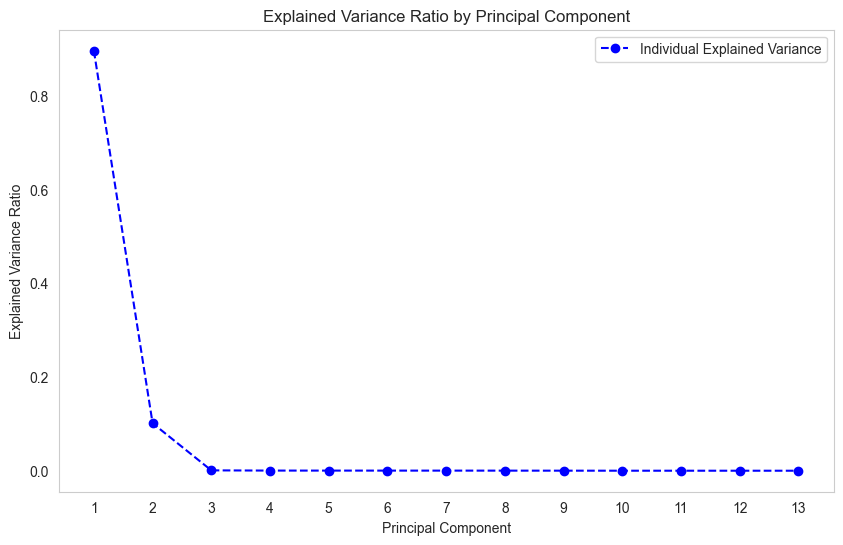

In [15]:
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', color='b', label='Individual Explained Variance')
plt.title('Explained Variance Ratio by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid()
plt.legend()

## Cumulative variance

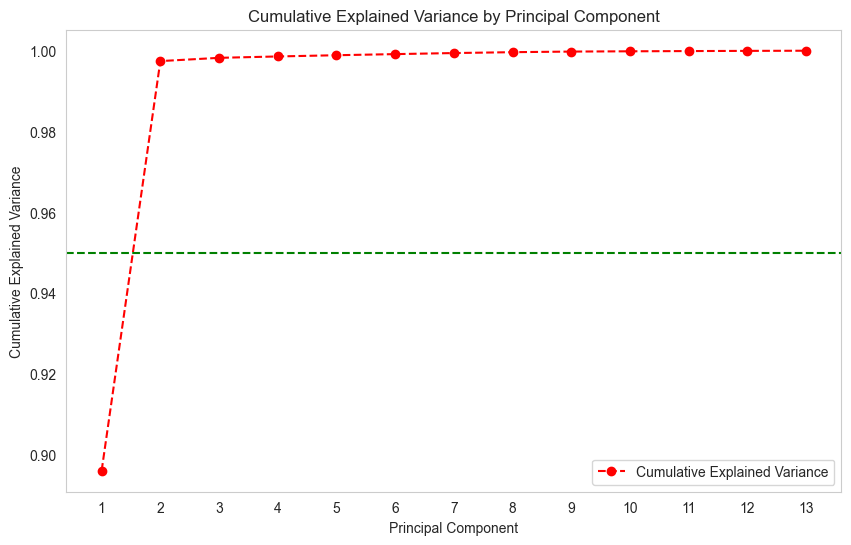

In [16]:
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='r', label='Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.axhline(y=0.95, color='g', linestyle='--')  # threshold for 95%
plt.grid()
plt.legend()
plt.show()

- ### From the graph above the optimal number of PCA components while still retaining 95% of information is 12

In [17]:
pca = PCA(n_components=12)
X_pca = pca.fit_transform(X)

In [18]:
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC_{i+1}' for i in range(X_pca.shape[1])])
pca_df['num'] = data['num'].reset_index(drop=True)
pca_df.to_csv('../data/pca_transformed_data.csv', index=False)

print('PCA-transformed dataset saved as pca_transformed_data.csv')

PCA-transformed dataset saved as pca_transformed_data.csv


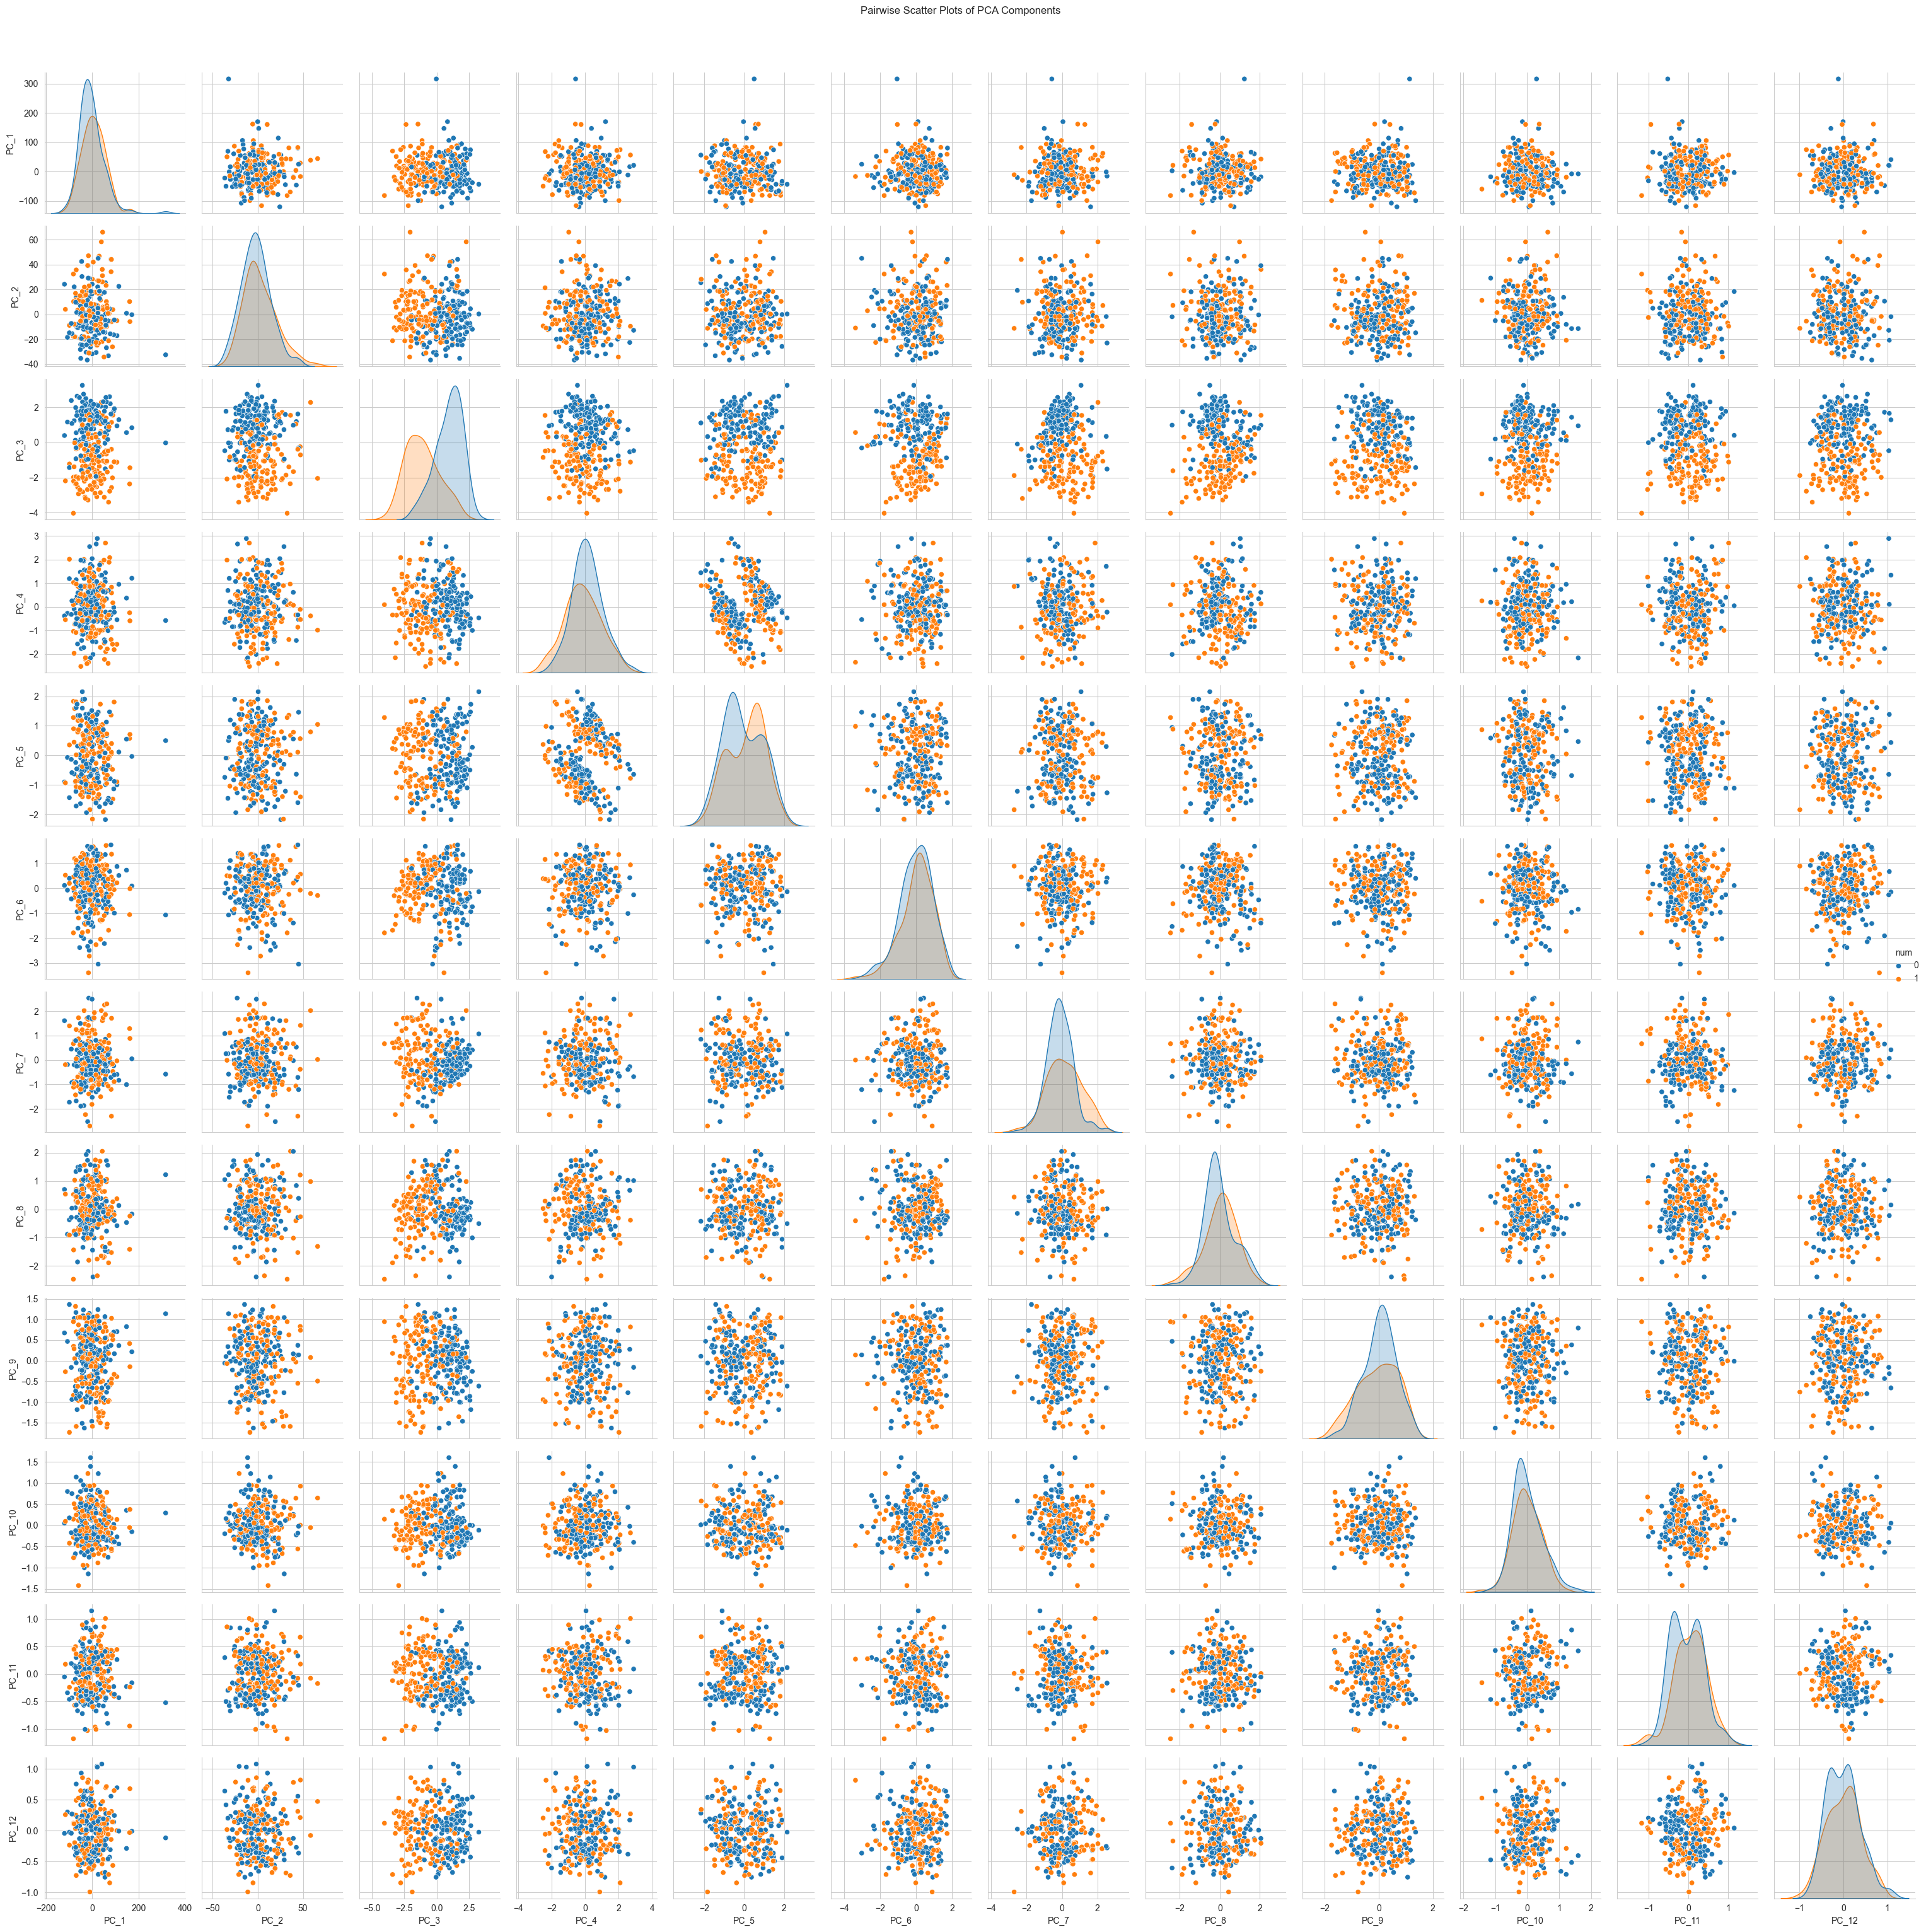

In [19]:
sns.pairplot(pca_df,hue='num')  
plt.suptitle('Pairwise Scatter Plots of PCA Components', y=1.02)
plt.tight_layout()
plt.show()

## Visulaizing PCA by Scatter plot
-  Using 2 components for the scatter plot

In [20]:
# Standardize features before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
target_map = {0: "No Disease", 1: "Disease"}  # adjust for your dataset
pca_df['target'] = y.map(target_map)


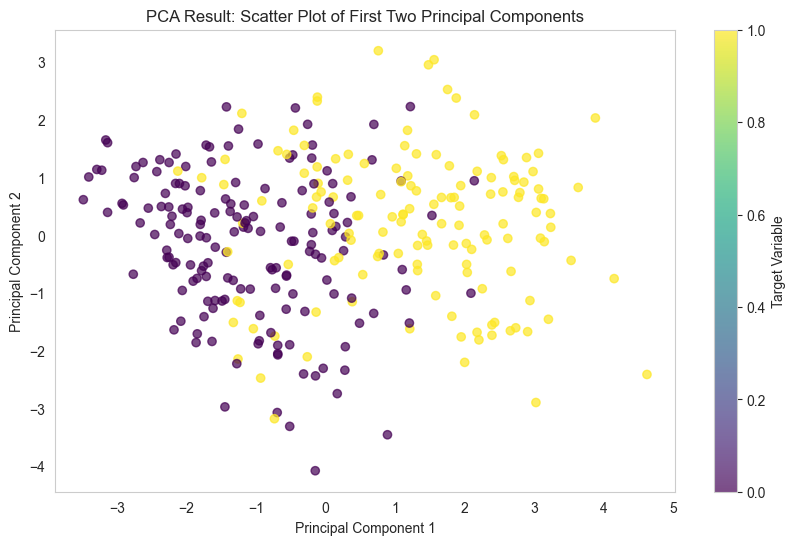

In [21]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=y, cmap='viridis', alpha=0.7)  # numeric values
plt.colorbar(scatter, label='Target Variable')
plt.title('PCA Result: Scatter Plot of First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()


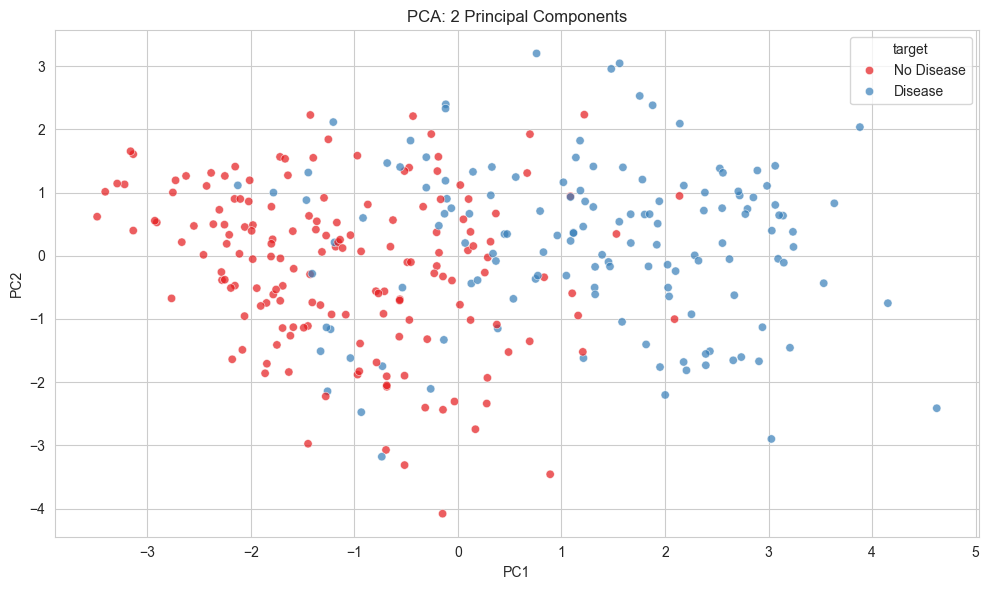

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='target', palette='Set1', alpha=0.7)
plt.title("PCA: 2 Principal Components")
plt.tight_layout()
plt.show()